VISUALIZZO UN'IMMAGINE A FORMA DI SPIRALE CON TUTTE LE PAROLE PIU FREQUENTI NEI TESTI DELLE CANZONI DI SANREMO 2024.Questo script in Python legge tutti i file .txt contenuti in una cartella (song.txt) (contenente testi di canzoni), esegue un'analisi linguistica con spaCy per estrarre le parole significative, rimuove le parole comuni (stopwords), genera una word cloud e visualizza le parole più frequenti.

In [16]:
!pip install spacy

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 2.1 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 2.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.2 MB 1.3 MB/s eta 0:00:05
   ----- ---------------------------------- 0.8/6.2 MB 1.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.0/6.2 MB 1.7 MB/s eta 0:00:04
   -------- ------------------------------- 1.3/6.2 MB 1.5 MB/s eta 0:00:04
   ---------- --------------------------

Numero di file: 30
Conteggio parole: 3184
[('boom', 36), ('amore', 31), ('cielo', 22), ('noia', 21), ('indietro', 21), ('guardare', 17), ('cuore', 16), ('mare', 16), ('sinceramente', 16), ('vorrei', 15)]
Fatto! Nuvola di parole a spirale con colori personalizzati salvata.


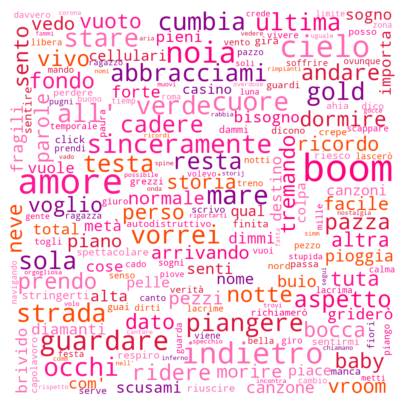

In [12]:
import os
import glob
import random
import spacy
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from string import punctuation
from collections import Counter
from wordcloud import WordCloud

spacy_model_name = "it_core_news_sm"
root = "songs_text/"

# Step 1: Elenca tutti i file di testo nella directory
files = glob.glob(root + "*.txt")
print("Numero di file:", len(files))

# Step 2: Leggi tutti i testi dai file
texts = []
for file in files:
    with open(file, "r", encoding="utf-8", errors="ignore") as f:
        texts.append(f.read().replace("’", "'").replace("\n", " "))

# Step 3: Carica il modello della lingua italiana per la tokenizzazione
nlp = spacy.load(spacy_model_name)

# Step 4: Tokenizza i testi in italiano e rimuovi punteggiatura, stopwords e metti in minuscolo le parole
tokens = []
for text in texts:
    ts = [token.text.lower() for token in nlp(text) if token.text not in punctuation]
    ts = [t for t in ts if not nlp.vocab[t].is_stop]
    tokens.append(ts)

# Step 5: Appiattisci la lista di token
tokens = [token for sublist in tokens for token in sublist]

# Step 6: Rimuovi le parole di una o due lettere
tokens = [token for token in tokens if len(token) > 3]

# Step 7: Mischia i token
random.shuffle(tokens)

# Step 8: Calcola il conteggio delle parole
word_count = len(tokens)
print("Conteggio parole:", word_count)

# Step 9: Stampa le parole più comuni
c = Counter(tokens)
print(c.most_common(10))

# Step 10: Carica la maschera a forma di spirale (assicurati di avere il file "spirale.png")
mask = np.array(Image.open("A spiral-shaped figure resembling a mosquito coil, with a color palette ranging from pink to purple to red, including all necessary shades between these colors..png"))

# Funzione personalizzata per i colori (rosa, viola, rosso)
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#ff007f", "#ff1493", "#ff4500", "#dc143c", "#8b008b", "#ff69b4"]
    return random.choice(colors)

# Genera la nuvola di parole con la maschera a spirale e colori personalizzati
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white",
                      mask=mask, color_func=custom_color_func).generate(" ".join(tokens))

# Mostra l'immagine
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud-sanremo-24.png")

print("Fatto! Nuvola di parole a spirale con colori personalizzati salvata.")

Fatto! Ora dovrebbe essere a spirale.


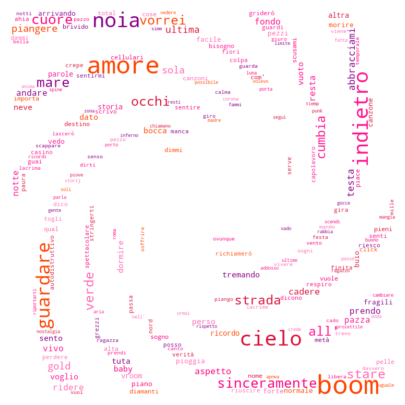

In [7]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carica la maschera
mask = np.array(Image.open("sfondo-a-spirale-in-bianco-e-nero_1048-16005.png").convert("L"))  # Converti in scala di grigi

# Inverti i colori se necessario (spirale deve essere bianca)
mask = np.where(mask > 128, 255, 0).astype(np.uint8)

# Funzione colori personalizzata
import random
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#ff007f", "#ff1493", "#ff4500", "#dc143c", "#8b008b", "#ff69b4"]
    return random.choice(colors)

# Genera la nuvola di parole
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white",
                      mask=mask, color_func=custom_color_func).generate(" ".join(tokens))

# Mostra l'immagine
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud-sanremo-24.png")

print("Fatto! Ora dovrebbe essere a spirale.")

Numero di file: 30
Conteggio parole: 3184
[('boom', 36), ('amore', 31), ('cielo', 22), ('indietro', 21), ('noia', 21), ('guardare', 17), ('mare', 16), ('sinceramente', 16), ('cuore', 16), ('occhi', 15)]
Fatto! Nuvola di parole a spirale con colori personalizzati salvata.


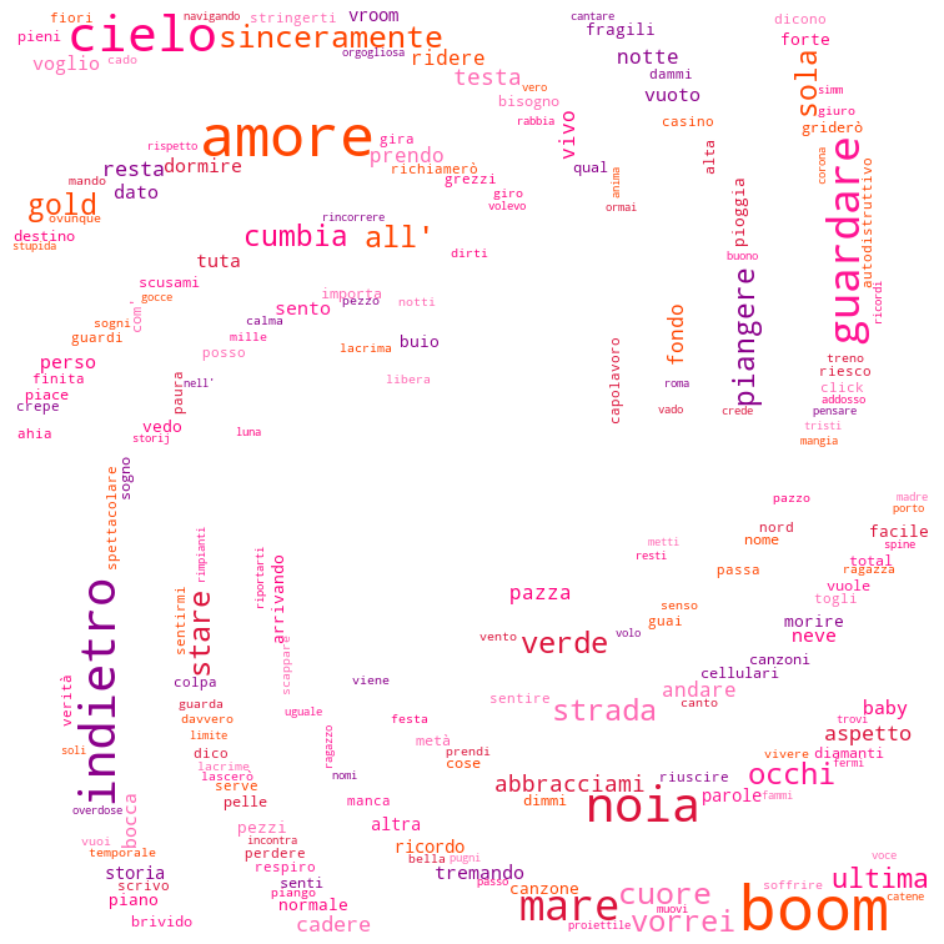

In [11]:
import os
import glob
import random
import spacy
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from string import punctuation
from collections import Counter
from wordcloud import WordCloud

spacy_model_name = "it_core_news_sm"
root = "songs_text/"

# Step 1: Elenca tutti i file di testo nella directory
files = glob.glob(root + "*.txt")
print("Numero di file:", len(files))

# Step 2: Leggi tutti i testi dai file
texts = []
for file in files:
    with open(file, "r", encoding="utf-8", errors="ignore") as f:
        texts.append(f.read().replace("’", "'").replace("\n", " "))

# Step 3: Carica il modello della lingua italiana per la tokenizzazione
nlp = spacy.load(spacy_model_name)

# Step 4: Tokenizza i testi in italiano e rimuovi punteggiatura, stopwords e metti in minuscolo le parole
tokens = []
for text in texts:
    ts = [token.text.lower() for token in nlp(text) if token.text not in punctuation]
    ts = [t for t in ts if not nlp.vocab[t].is_stop]
    tokens.append(ts)

# Step 5: Appiattisci la lista di token
tokens = [token for sublist in tokens for token in sublist]

# Step 6: Rimuovi le parole di una o due lettere
tokens = [token for token in tokens if len(token) > 3]

# Step 7: Mischia i token
random.shuffle(tokens)

# Step 8: Calcola il conteggio delle parole
word_count = len(tokens)
print("Conteggio parole:", word_count)

# Step 9: Stampa le parole più comuni
c = Counter(tokens)
print(c.most_common(10))

# Step 10: Carica la maschera a forma di spirale (assicurati di avere il file "spirale.png")
mask = np.array(Image.open("sfondo-a-spirale-in-bianco-e-nero_1048-16005.png"))

# Funzione personalizzata per i colori (rosa, viola, rosso)
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#ff007f", "#ff1493", "#ff4500", "#dc143c", "#8b008b", "#ff69b4"]
    return random.choice(colors)

# Genera la nuvola di parole con la maschera a spirale e colori personalizzati
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white",
                      mask=mask, color_func=custom_color_func).generate(" ".join(tokens))

# Mostra l'immagine
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud-sanremo-2024.png")

print("Fatto! Nuvola di parole a spirale con colori personalizzati salvata.")

Fatto! SANREMO dovrebbe apparire al centro.


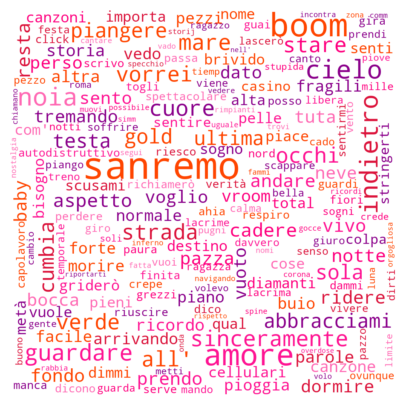

In [13]:
# Aggiungi "SANREMO" molte volte per aumentare la probabilità che sia al centro
for _ in range(50):  # Puoi aumentare il numero se necessario
    tokens.append("sanremo")

# Genera la nuvola di parole con la maschera a spirale e colori personalizzati
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white",
                      mask=mask, color_func=custom_color_func, collocations=False).generate(" ".join(tokens))

# Mostra l'immagine
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud-sanremo-VENTIQUATTRO.png")

print("Fatto! SANREMO dovrebbe apparire al centro.")